val __Tmall_2021_05_11__07_20_17_lr_0.001_reg_0.001_batch_size_512_time_slot_777600_gnn_layer_[16,16,16]
74
val __Tmall_2021_05_11__07_36_51_lr_0.001_reg_0.001_batch_size_512_time_slot_777600_gnn_layer_[16,16,16]
62
val __Tmall_2021_05_11__07_20_17_lr_0.001_reg_0.001_batch_size_512_time_slot_777600_gnn_layer_[16,16,16]
val __Tmall_2021_05_11__07_36_51_lr_0.001_reg_0.001_batch_size_512_time_slot_777600_gnn_layer_[16,16,16]
<ipython-input-16-0efb4980e2eb>:142: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(131)
<ipython-input-16-0efb4980e2eb>:152: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a n

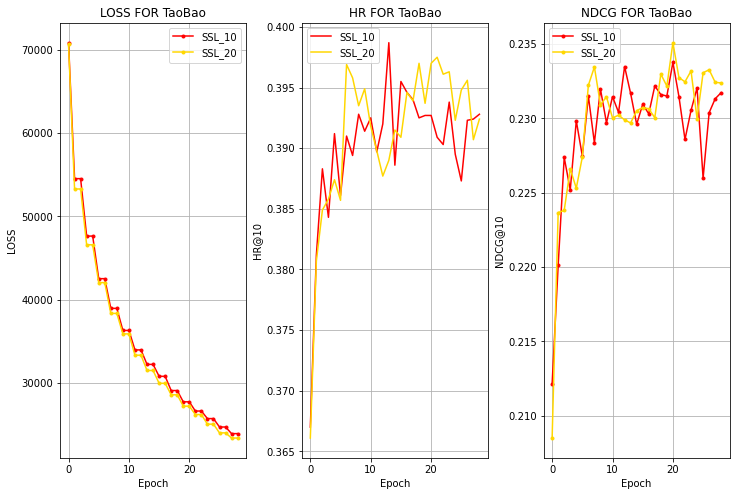

In [16]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

colors = [
    'red', 'gold', 'darkred', 'black', 'navy','slateblue','coral','darkorange', 'cyan', 'dodgerblue', 'darkorange', 'crimson'
    ]
#, 'blue', 'green', 'black'
#青蓝色： , 'cyan'  
#玫红色： , 'magenta'
#浅粉色： , 'pink'
#紫色（深哑光很好看）： , 'purple'
#粑粑色（不好看）： ,'chocolate'
#土黄色（不好看）： , 'orange'
#铁蓝色（很好看）： , 'steelblue'
#深红色（好看）： , 'crimson'
#浅绿色： , 'lightgreen'
#三文鱼色：, 'salmon'      
#金色（亮亮的黄）： ,
#黑色： 
#, 'darkorange'
#, 'sandybrown'
# 'darkgreen'
# 'dodgerblue'
#'coral'
#, 'slateblue'
#'blue'


lines = ['-', '--', '-.', ':']


# #Tmall
sets = [
"__Tmall_2021_05_11__07_20_17_lr_0.001_reg_0.001_batch_size_512_time_slot_777600_gnn_layer_[16,16,16]",
"__Tmall_2021_05_11__07_36_51_lr_0.001_reg_0.001_batch_size_512_time_slot_777600_gnn_layer_[16,16,16]",
# "__Tmall_2021_05_11__07_21_36_lr_0.001_reg_0.001_batch_size_512_time_slot_777600_gnn_layer_[16,16,16]",
# "__Tmall_2021_05_11__10_01_19_lr_0.001_reg_0.001_batch_size_512_time_slot_777600_gnn_layer_[16,16,16]",

]

names = [
"SSL_10",
"SSL_20",
# "NO_SSL",
# "SSL_20_multi_behavior",
]



# #IJCAI
# sets = [
# "ours_again_self_attention_behavior_IJCAI_15_2021_03_23__09_50_14_lr_0.001_reg_0.016_batch_size_4096_time_slot_7776000_gnn_layer_[64,64]",
# "mean_again_self_attention_behavior_IJCAI_15_2021_03_24__23_29_08_lr_0.001_reg_0.0125_batch_size_1024_time_slot_5184000_gnn_layer_[48]",
# "RNN_again_self_attention_behavior_IJCAI_15_2021_03_24__14_23_48_lr_0.001_reg_0.01_batch_size_1024_time_slot_7776000_gnn_layer_[16]",
# "_self_attention_behavior_IJCAI_15_2021_03_17__08_08_50_lr_0.001_reg_0.01_batch_size_4096_time_slot_5184000_gnn_layer_[16]",
# "No_GNN_self_attention_behavior_IJCAI_15_2021_03_17__08_28_44_lr_0.001_reg_0.01_batch_size_4096_time_slot_5184000_gnn_layer_[16, 16]",
# ]

# names = [
#     "HGNN + self_attention + behavior_attention(*)",
#     "HGNN + self_attention + behavior_mean",
#     "HGNN + GRU + behavior_attention",
#     "HGNN + self_attention + no_behavior",
#     "self_attention + behavior_attention",
# ]



smooth = 1
startLoc = 1
Length = 40

# dataset = "Epinions_time"
dataset = "Tmall"
# dataset = "IJCAI_15"



#获得序列的length
MIN_LENGTH = 30
for j in range(len(sets)):
    val = sets[j]
    name = names[j]
    print('val', val)
    with open(r'./History/' + dataset + r'/' + val + '.his', 'rb') as fs:
        res = pickle.load(fs)
    temlength = len(res['HR'])
    print(temlength)
    if temlength<MIN_LENGTH:
        MIN_LENGTH = temlength 


for j in range(len(sets)):
    val = sets[j]
    name = names[j]
    print('val', val)
    with open(r'./History/' + dataset + r'/' + val + '.his', 'rb') as fs:
        res = pickle.load(fs)
    # rmse = res['step_rmse']
    # mae = res['step_mae']
    # for i in range(len(rmse)):
    # 	print("rmse %d: %.4f"%(i, rmse[i]))
    # for i in range(len(mae)):
    # 	print("mae %d: %.4f"%(i, mae[i]))

    # printBest(res)
    # length = Length   #---------------------------------------------------------
    length = MIN_LENGTH
    temy = [None] * 3
    temlength = len(res['HR'])
    temy[0] = np.array(res['loss'][startLoc:min(length, temlength)])
    temy[1] = np.array(res['HR'][startLoc:min(length, temlength)])
    temy[2] = np.array(res['NDCG'][startLoc:min(length, temlength)])

    for i in range(3):
        if len(temy[i]) < length - startLoc:
            temy[i] = np.array(
                list(temy[i]) + [temy[i][-1]] * (length - temlength))
    length -= 1
    y = [[], [], []]
    for i in range(int(length / smooth)):
        if i * smooth + smooth - 1 >= len(temy[0]):
            break
        for k in range(3):
            temsum = 0.0
            for l in range(smooth):
                temsum += temy[k][i * smooth + l]
            y[k].append(temsum / smooth)
    y = np.array(y)
    length = y.shape[1]
    x = np.zeros((3, length))
    for i in range(3):
        x[i] = np.array(list(range(length)))
    
    width = 12
    height = 8
    # plt.figure(1)
    plt.figure(1, figsize=(width,height))


    plt.subplot(131)    
    # plt.title('LOSS FOR IJCAI_CONTEST')
    plt.title('LOSS FOR TaoBao')
    plt.xlabel('Epoch')
    plt.ylabel('LOSS')
    # print(y[0])
    plt.plot(x[0], y[0], color=colors[j], label=name, marker='.')
    plt.legend()
    plt.grid(True)

    plt.subplot(132)
    # plt.title('HR FOR IJCAI_CONTEST')
    plt.title('HR FOR TaoBao')
    plt.xlabel('Epoch')
    plt.ylabel('HR@10')
    plt.plot(x[1], y[1], color=colors[j], label=name)  # , marker='.')
    plt.legend()
    plt.grid(True)

    plt.subplot(133)
    # plt.title('NDCG FOR IJCAI_CONTEST')
    plt.title('NDCG FOR TaoBao')
    plt.xlabel('Epoch')
    plt.ylabel('NDCG@10')
    plt.plot(x[2], y[2], color=colors[j], label=name, marker='.')
    plt.legend()
    plt.grid(True)

    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)  #wspace, hspace调整子图之间的距离
    # set(gcf,'position',[0.2,0.2,0.5,0.5])

#IJCAI
# plt.savefig('D:\CODE\master_behavior_attention\Picture\IJCAI_LOSS_dot.pdf')
# plt.savefig('D:\CODE\master_behavior_attention\Picture\IJCAI_LOSS.pdf')

# plt.savefig('D:\CODE\master_behavior_attention\Picture\IJCAI_HR_dot.pdf')
# plt.savefig('D:\CODE\master_behavior_attention\Picture\IJCAI_HR.pdf')

# plt.savefig('D:\CODE\master_behavior_attention\Picture\IJCAI_NDCG_dot.pdf')
# plt.savefig('D:\CODE\master_behavior_attention\Picture\IJCAI_NDCG.pdf')

# plt.savefig('D:\CODE\master_behavior_attention\Picture\IJCAI_all.pdf')

#TaoBao
# plt.savefig('D:\CODE\master_behavior_attention\Picture\TaoBao_LOSS_dot.pdf')
# plt.savefig('D:\CODE\master_behavior_attention\Picture\TaoBao_LOSS.pdf')

# plt.savefig('D:\CODE\master_behavior_attention\Picture\TaoBao_HR_dot.pdf')
# plt.savefig('D:\CODE\master_behavior_attention\Picture\TaoBao_HR.pdf')

# plt.savefig('D:\CODE\master_behavior_attention\Picture\TaoBao_NDCG_dot.pdf')
# plt.savefig('D:\CODE\master_behavior_attention\Picture\TaoBao_NDCG.pdf')

# plt.savefig('D:\CODE\master_behavior_attention\Picture\TaoBao_all.pdf')

plt.show()
